In [1]:
import nidaqmx
import numpy as np
import matplotlib.pyplot as plt
import VOA_lib
import sys

_dev_read = "Dev1/ai1" # DAQ input channel
_dev_write = "Dev1/ao1" # DAQ output channel
class DAQ:
    def read(self, dev_id = _dev_read):
        with nidaqmx.Task() as task:
            task.ai_channels.add_ai_voltage_chan(dev_id)
            return np.mean(task.read(number_of_samples_per_channel=3))
        
    def write(self, voltage, dev_id = _dev_write):
        with nidaqmx.Task() as analog_output:
            analog_output.ao_channels.add_ao_voltage_chan(dev_id)
            analog_output.write(voltage)
            


In [2]:
daq = DAQ()
daq.read()

-0.002407664681088947

In [3]:
att = VOA_lib.VOA("Dev1/ao1", "./calib_U00312.json")
att.set_att(2)

Calibration file read successfully (./calib_U00312.json)


In [7]:
att.set_att(30)

VOA U00312: Desired attenuation is too high. Voltage (5.254) was set to maximum.


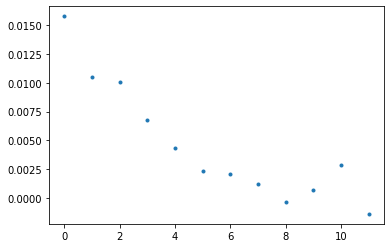

In [9]:
read_lst = []
for att_val in range(3, 15):
    att.set_att(att_val)
    read_lst.append(daq.read())
    
plt.plot(read_lst, '.')

In [ ]:
buddy_max = 0.3
buddy_min = 0.004
step_down = 3
step_up = 0.05
att_min = 5

att_val = 10
att.set_att(att_val)

#read_lst = []
#att_lst = []

buddy_memory = 0

while True:
    buddy_read = daq.read()
    buddy_memory = max(buddy_memory, buddy_read)

    
    if buddy_read > buddy_max:
        sys.stdout.write('\r'+"down, att: {:5.3f}, historical max: {:5.3f}, measured: {:6.3f} V".format(att_val, buddy_memory, buddy_read))
        
        att_val=att_val+step_down
        att.set_att(att_val)     
    
    elif buddy_read < buddy_min and att_val>att_min:
        sys.stdout.write('\r'+" up, att: {:5.3f} , historical max: {:5.3f}, measured: {:6.3f} V".format(att_val, buddy_memory, buddy_read))
        
        att_val = att_val-step_up
        att.set_att(att_val)
        
    else:
        sys.stdout.write('\r'+" att: {:5.3f}, historical max: {:5.3f},      measured: {:6.3f} V".format(att_val, buddy_memory, buddy_read))
        
#plt.plot(read_lst, '.')

 att: 5.000, historical max: 0.025,      measured:  0.008 VV